In [20]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import linalg

In [99]:
N = 3
scale=1
h = np.array([0.2, 0.6, 0.2])
M1 = 7
M2 = 5
Nx = 5
x = np.reshape(np.array([0.25, 1., 0, 0.75, 0.5]), (5, 1))

In [100]:
h0 = h2 = 0.2
h1 = 0.6

In [101]:
H = np.array([[h0, 0,0,0,0],
          [h1, h0, 0, 0, 0],
          [h2, h1, h0, 0, 0],
          [0, h2, h1, h0, 0],
          [0, 0, h2, h1, h0],
          [0, 0, 0, h2, h1],
          [0, 0, 0, 0, h2]])

In [102]:
def h2mat(h, M1, M2):
    Hn = h.size
    H = np.zeros((M1, M2))
    for i in xrange(M1):
        if i < Hn:
            H[i, :i+1] = h[:i+1]
        elif (i >= Hn) & (i < M2):
            H[i, i-Hn+1: i+1] = h[:]
        else:
            istart = i - M2 + 1
            H[i, i-Hn+1:] = h[istart:]
    
    return H

In [105]:
H = h2mat(h, 7, 5)

In [107]:
y = np.dot(H, x)

In [116]:
yn = y + np.random.randn(7, 1) * 0.25

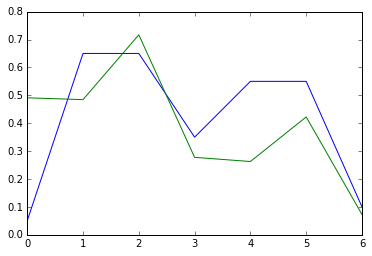

In [119]:
plt.plot(y)
plt.plot(yn)

In [141]:
gauss_deriv = lambda x, sigma: x**2 * np.exp(-x**2/(2*sigma**2))

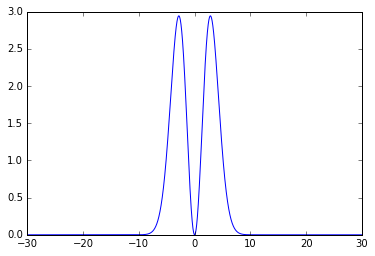

In [193]:
N = 6001
i1 = np.linspace(-30, 30, N)
di = 0.01
plt.plot(i1, gauss_deriv(i1, 2.0))

In [194]:
Ih = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        Ih[i, j] = i-j
Ih = Ih * di

In [195]:
H_discrete = gauss_deriv(Ih, 2.0)

In [196]:
u, d, v = linalg.svd(H_discrete)

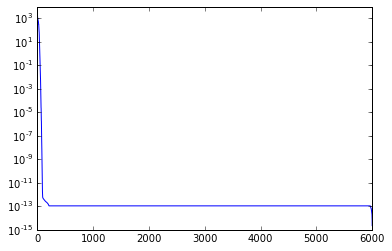

In [197]:
plt.semilogy(d)

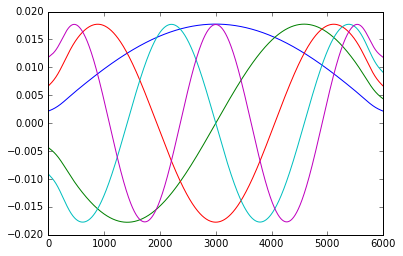

In [199]:
for i in xrange(5):
    plt.plot(u.T[i]*-1)

In [145]:
h = gauss_deriv(i, 2.0)

In [151]:
hr = h.reshape((1, 101))

In [154]:
hr 

array([[  3.72665317e-04,   5.87147067e-04,   9.15103117e-04,
          1.41082503e-03,   2.15149349e-03,   3.24528909e-03,
          4.84166525e-03,   7.14404888e-03,   1.04251243e-02,
          1.50446672e-02,   2.14696082e-02,   3.02956078e-02,
          4.22689077e-02,   5.83065991e-02,   7.95127456e-02,
          1.07187065e-01,   1.42822200e-01,   1.88085111e-01,
          2.44777898e-01,   3.14773667e-01,   3.99923875e-01,
          5.01935243e-01,   6.22216731e-01,   7.61700311e-01,
          9.20643176e-01,   1.09842334e+00,   1.29334494e+00,
          1.50247329e+00,   1.72152251e+00,   1.94481927e+00,
          2.16536453e+00,   2.37501115e+00,   2.56476714e+00,
          2.72522464e+00,   2.84710196e+00,   2.92187221e+00,
          2.94243901e+00,   2.90380774e+00,   2.80369299e+00,
          2.64300022e+00,   2.42612264e+00,   2.16100487e+00,
          1.85894153e+00,   1.53410089e+00,   1.20278910e+00,
          8.82496903e-01,   5.90794462e-01,   3.44159093e-01,
        

# Compression

In [219]:
N = 100
x = np.random.randn(N, N)

In [220]:
xu, xd, xv = linalg.svd(x)

In [229]:
i = np.argmax(np.cumsum(xd)/np.sum(xd) > 0.99)

In [255]:
linalg.norm(x - np.dot(xu, np.dot(np.diagflat(xd), xv)))

2.2762767581103977e-13

In [265]:
linalg.norm(x - np.dot(xu[:, :i], np.dot(np.diagflat(xd[:i]), xv[:i, :])))

3.4329258041444537

In [268]:
xapprox = np.dot(xu[:, :i], np.dot(np.diagflat(xd[:i]), xv[:i, :]))

In [270]:
x

array([[-0.91935672, -2.48025968,  0.27418905, ..., -1.59667344,
         0.30437105,  0.70269981],
       [ 0.27206086, -2.18402507,  0.19666051, ..., -1.08024556,
         1.46370639, -2.28756226],
       [ 0.28436266, -0.17482899,  0.9593626 , ...,  1.47414398,
        -1.06492138, -0.11154751],
       ..., 
       [ 1.13489723,  2.29263497, -0.37508858, ..., -0.1715751 ,
         1.09046102,  0.74750799],
       [-0.87234468,  0.77116066,  0.23118753, ...,  0.75379912,
         0.43435846, -0.06807941],
       [-0.36293184, -2.33935441, -0.47195812, ..., -0.29979967,
        -0.39988917, -0.88066571]])

In [278]:
(100*89 + 89*100 + 89) / 100**2

1.7889

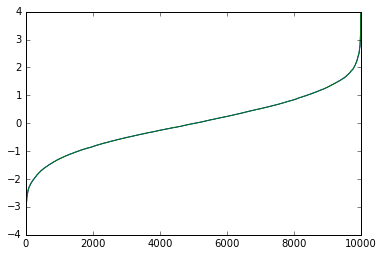

In [274]:
plt.plot(np.sort(x.ravel()))
plt.plot(np.sort(xapprox.ravel()))